# Hypothesis Testing 
Part 4

Jacob Tanzi

Using MySQL database from part 3

Answer questions for your stakeholder. 

#### *what makes a successful movie??*



#### Questions to Answer

#### Q1
* Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?



#### Null Hypothesis
The MPAA rating of a movie does not affect the revenue generated
#### Alternative Hypothesis
The MPAA rating of a movie has a significant affect on the revenue generated

* Select the correct test according to the data type and number of samples
* Numerical Data
* Two groups rating and revenue
* Run a 2-sample T-test.

#### Q2
Do movies that are over 2 hours long earn more revenue than movies that are 1.5 hours long (or less)?
#### Null Hypothesis
There is no difference in earned revenue between movies that are over 2 hours long, than movies that are 1.5 hours long or less 
#### Alternative Hypothesis
There is a significant difference in earned revenue between movies that are over 2 hours long, than movies that are 1.5 hours long or less 


* Numerical Data
* Two groups runtime and revenue
* Run a 2-sample T-test.




#### Q3
Do some movie genres earn more revenue than others?
#### Null Hypothesis
The genre of a movie has no affect on revenue 

#### Alternative Hypothesis
The genre of a movie has a significant affect on revenue 



* Numerical Data
* Two groups revenue and genre(ohe)
* Run a 2-sample T-test.

In [1]:
import os, json, math, time
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
np.random.seed(321)

* They want you to perform a statistical test to get a mathematically-supported answer.
* They want you to report if you found a significant difference between ratings.
 * If so, what was the p-value of your analysis?
 * And which rating earns the most revenue?
 
* They want you to prepare a visualization that supports your finding.





#### Specifications
#### Your Data

* A critical first step for this assignment will be to retrieve additional movie data to add to your SQL database.
 * You will want to use the TMDB API again and extract data for additional years.
 * You may want to review the optional lesson from Week 1 on "Using Glob to Load Many Files" to load and combine all of your API results for each year.

* However, trying to extract the TMDB data for all movies from 2000-2022 could take >24 hours!

* To address this issue, you should EITHER:
 * Define a smaller (but logical) period of time to use for your analyses (e.g., last 10 years, 2010-2019 (pre-pandemic, etc).

 * OR coordinate with cohort-mates and divide the API calls so that you can all download the data for a smaller number of years and then share your downloaded JSON data.




In [2]:
FOLDER = "Data/"
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 '2010-2021',
 'Data',
 'TMDB api.ipynb',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2012.json',
 'tmdb_api_results_2013.json',
 'tmdb_api_results_2014.json',
 'tmdb_api_results_2015.json',
 'tmdb_api_results_2016.json',
 'tmdb_api_results_2017.json',
 'tmdb_api_results_2018.json',
 'tmdb_api_results_2019.json',
 'tmdb_api_res

In [3]:
q = FOLDER+"*.csv.gz"
print(q)

Data/*.csv.gz


In [4]:
file_list = glob.glob(q)
file_list

['Data\\combined_tmdb_data.csv.gz',
 'Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2021.csv.gz',
 'Data\\title_akas.csv.gz',
 'Data\\title_basics.csv.gz',
 'Data\\title_ratings.csv.gz',
 'Data\\tmdb_results_combined.csv.gz']

In [5]:
q = FOLDER+"*.csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/*.csv.gz


['Data\\combined_tmdb_data.csv.gz',
 'Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2021.csv.gz',
 'Data\\title_akas.csv.gz',
 'Data\\title_basics.csv.gz',
 'Data\\title_ratings.csv.gz',
 'Data\\tmdb_results_combined.csv.gz']

In [6]:
q = FOLDER+"/**/*.csv.gz"
print(q)
file_list = sorted(glob.glob(q,recursive=True))
file_list

Data//**/*.csv.gz


['Data\\combined_tmdb_data.csv.gz',
 'Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2021.csv.gz',
 'Data\\title_akas.csv.gz',
 'Data\\title_basics.csv.gz',
 'Data\\title_ratings.csv.gz',
 'Data\\tmdb_results_combined.csv.gz']

In [7]:
df = pd.concat([pd.read_csv(f, low_memory=False) for f in file_list])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2594,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2595,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2596,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",NaN,201706.0,cn,致命密函,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049345 entries, 0 to 0
Data columns (total 45 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   imdb_id                object 
 1   adult                  float64
 2   backdrop_path          object 
 3   belongs_to_collection  object 
 4   budget                 float64
 5   genres                 object 
 6   homepage               object 
 7   id                     float64
 8   original_language      object 
 9   original_title         object 
 10  overview               object 
 11  popularity             float64
 12  poster_path            object 
 13  production_companies   object 
 14  production_countries   object 
 15  release_date           object 
 16  revenue                float64
 17  runtime                float64
 18  spoken_languages       object 
 19  status                 object 
 20  tagline                object 
 21  title                  object 
 22  video                  f

In [10]:
#remove 0's
df = df.loc[ df['imdb_id']!='0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,267.0
2049351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,18.0
2049352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,5461.0
2049353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,14.0


In [11]:
#reset index
df = df.reset_index(drop=True)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,267.0
2049340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,18.0
2049341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,5461.0
2049342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,14.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049344 entries, 0 to 2049343
Data columns (total 45 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   imdb_id                object 
 1   adult                  float64
 2   backdrop_path          object 
 3   belongs_to_collection  object 
 4   budget                 float64
 5   genres                 object 
 6   homepage               object 
 7   id                     float64
 8   original_language      object 
 9   original_title         object 
 10  overview               object 
 11  popularity             float64
 12  poster_path            object 
 13  production_companies   object 
 14  production_countries   object 
 15  release_date           object 
 16  revenue                float64
 17  runtime                float64
 18  spoken_languages       object 
 19  status                 object 
 20  tagline                object 
 21  title                  object 
 22  video             

## Preprocessing 

In [13]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage',
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,...,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.467,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.935,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.334,[],2000-04-14,0.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",31.409,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...",2000-09-29,14204632.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",3.343,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",2000-09-02,0.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,267.0
2049340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,18.0
2049341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,5461.0
2049342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt9916428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,14.0


## Feature Engineering

* Collection to boolean
* Pull out Genre names then OHE
* Cleaning
* Converting release date to year, month

In [14]:
df['belongs_to_collection'].notna().sum()

422

In [15]:
# Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    2048922
True         422
Name: belongs_to_collection, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049344 entries, 0 to 2049343
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   imdb_id                object 
 1   adult                  float64
 2   belongs_to_collection  bool   
 3   budget                 float64
 4   genres                 object 
 5   popularity             float64
 6   production_companies   object 
 7   release_date           object 
 8   revenue                float64
 9   runtime                float64
 10  status                 object 
 11  title                  object 
 12  vote_average           float64
 13  vote_count             float64
         object 
               float64
 16  certification          object 
 17  titleId                object 
 18  ordering               float64
 19  region                 object 
 20  language               object 
 21  types                  object 
 22  attributes             object 
 23  isOriginalTitl

In [17]:
df['genres'][0]

"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}]"

In [19]:
def get_genre_name(x):
    if isinstance(x, str):
        try:
            x = x.replace("'", '"')
            x = json.loads(x)
            genres = []
            for item in x:
                genres.append(item['name'])
            return genres
        except json.JSONDecodeError:
            return []  # Return an empty list if JSON decoding fails
    return []

In [20]:
get_genre_name(df.loc[3,'genres'])

['Drama', 'Romance']

In [21]:
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.467,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.467,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.467,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.935,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.334,[],2000-04-14,0.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drama


In [22]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [23]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df

C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.467,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.935,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,...,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.334,[],2000-04-14,0.0,152.0,...,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",31.409,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...",2000-09-29,14204632.0,99.0,...,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",3.343,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",2000-09-02,0.0,99.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049339,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049340,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049341,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049342,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])
df

C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,imdb_id,adult,belongs_to_collection,budget,popularity,production_companies,release_date,revenue,runtime,status,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,2.467,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,Released,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,1.935,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,Released,...,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,1.334,[],2000-04-14,0.0,152.0,Released,...,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,31.409,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...",2000-09-29,14204632.0,99.0,Released,...,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,3.343,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",2000-09-02,0.0,99.0,Released,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049339,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049340,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049341,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049342,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049344 entries, 0 to 2049343
Data columns (total 52 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   imdb_id                object 
 1   adult                  float64
 2   belongs_to_collection  bool   
 3   budget                 float64
 4   popularity             float64
 5   production_companies   object 
 6   release_date           object 
 7   revenue                float64
 8   runtime                float64
 9   status                 object 
 10  title                  object 
 11  vote_average           float64
 12  vote_count             float64
         object 
               float64
 15  certification          object 
 16  titleId                object 
 17  ordering               float64
 18  region                 object 
 19  language               object 
 20  types                  object 
 21  attributes             object 
 22  isOriginalTitle        float64
 23  tconst        

In [26]:
## Checking Certification values
df['certification'].value_counts(dropna=False)

NaN        2048532
R              466
PG-13          182
NR              71
PG              62
G               24
NC-17            6
Unrated          1
Name: certification, dtype: int64

In [27]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()

In [28]:
## fix certification col
repl_cert = {'Unrated':'NR',}

df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      2048532
R            466
PG-13        182
NR            72
PG            62
G             24
NC-17          6
Name: certification, dtype: int64

In [29]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,imdb_id,adult,belongs_to_collection,budget,popularity,production_companies,release_date,revenue,runtime,status,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,2.467,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,Released,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.935,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,Released,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,1.334,[],2000-04-14,0.0,152.0,Released,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,31.409,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...",2000-09-29,14204632.0,99.0,Released,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,3.343,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",2000-09-02,0.0,99.0,Released,...,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049339,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049340,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049341,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049342,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df[df['release_date'].isna()]

C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,imdb_id,adult,belongs_to_collection,budget,popularity,production_companies,release_date,revenue,runtime,status,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
120,tt0164182,0.0,False,0.0,0.6,[],NaN,0.0,0.0,Released,...,False,False,False,False,False,False,False,NaN,NaN,NaN
498,tt0216250,0.0,False,0.0,0.6,[],NaN,0.0,85.0,Released,...,False,False,False,False,False,False,False,NaN,NaN,NaN
849,tt0250944,0.0,False,0.0,0.6,[],NaN,0.0,0.0,Released,...,False,False,False,False,False,False,False,NaN,NaN,NaN
963,tt0264927,0.0,False,0.0,0.6,[],NaN,0.0,93.0,Released,...,False,False,True,False,False,False,False,NaN,NaN,NaN
972,tt0265675,0.0,False,0.0,0.6,[],NaN,0.0,0.0,Released,...,False,False,False,False,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049339,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049340,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049341,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049342,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
## drop original feature
df = df.drop(columns=['release_date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049344 entries, 0 to 2049343
Data columns (total 54 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   imdb_id                object 
 1   adult                  float64
 2   belongs_to_collection  bool   
 3   budget                 float64
 4   popularity             float64
 5   production_companies   object 
 6   revenue                float64
 7   runtime                float64
 8   status                 object 
 9   title                  object 
 10  vote_average           float64
 11  vote_count             float64
         object 
               float64
 14  certification          object 
 15  titleId                object 
 16  ordering               float64
 17  region                 object 
 18  language               object 
 19  types                  object 
 20  attributes             object 
 21  isOriginalTitle        float64
 22  tconst                 object 
 23  titleType     

In [33]:
## Check status
df['status'].value_counts()

Released    5192
Name: status, dtype: int64

In [34]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

,imdb_id,adult,belongs_to_collection,budget,popularity,production_companies,revenue,runtime,title,vote_average,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,2.467,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,5.500,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.935,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",0.0,100.0,For the Cause,5.450,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,1.334,[],0.0,152.0,Gang,4.000,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,31.409,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...",14204632.0,99.0,In the Mood for Love,8.110,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,3.343,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",0.0,99.0,Chinese Coffee,6.642,...,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188,tt7797790,0.0,False,0.0,0.600,"[{'id': 139554, 'logo_path': None, 'name': 'Am...",0.0,72.0,Edmund Kemper Part 3: La mort sévit,0.000,...,False,False,False,False,False,False,False,2001.0,1.0,1.0
5189,tt8665056,0.0,False,0.0,0.600,"[{'id': 68934, 'logo_path': None, 'name': 'Ske...",0.0,85.0,Guns Along The Bravo,0.000,...,False,False,False,True,False,False,False,2001.0,10.0,10.0
5190,tt8795764,0.0,False,0.0,0.600,"[{'id': 133614, 'logo_path': None, 'name': 'Wo...",0.0,57.0,New Breed,0.000,...,False,False,False,False,False,False,False,2001.0,1.0,1.0
5191,tt9071078,0.0,False,0.0,2.410,"[{'id': 13958, 'logo_path': '/yblRwoxf2sGIzzWV...",0.0,90.0,Chinese Heroes,3.000,...,False,False,False,False,False,False,False,2001.0,7.0,12.0


In [35]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

,imdb_id,adult,belongs_to_collection,budget,popularity,production_companies,revenue,runtime,title,vote_average,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,tt0118694,0.0,False,150000.0,31.409,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...",14204632.0,99.0,In the Mood for Love,8.110,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,tt0120467,0.0,False,120000.0,5.215,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...",14904.0,87.0,Vulgar,5.500,...,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,tt0120630,0.0,True,45000000.0,61.662,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...",224834564.0,84.0,Chicken Run,6.751,...,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,tt0120753,0.0,False,8000000.0,10.796,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...",105983.0,122.0,The Million Dollar Hotel,5.881,...,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,tt0120755,0.0,True,125000000.0,50.579,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...",546388105.0,123.0,Mission: Impossible II,6.120,...,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,tt0294289,0.0,False,344.0,0.837,"[{'id': 4676, 'logo_path': '/fu7gOKwS2l2fiFlEQ...",342855.0,104.0,American Adobo,4.400,...,False,False,False,False,False,False,False,2001.0,9.0,29.0
4897,tt0296042,0.0,False,1400010.0,16.737,"[{'id': 1195, 'logo_path': None, 'name': 'Omeg...",80631.0,129.0,Ichi the Killer,6.976,...,False,False,False,False,False,False,False,2001.0,12.0,22.0
5009,tt0310790,0.0,True,3747230.0,3.386,"[{'id': 103397, 'logo_path': None, 'name': 'Dy...",482902.0,83.0,The Living Forest,5.400,...,False,False,False,False,False,False,False,2003.0,1.0,2.0
5121,tt0445841,0.0,False,12500000.0,1.960,"[{'id': 5636, 'logo_path': None, 'name': 'Beij...",123021750.0,94.0,A Gambler's Story,6.800,...,False,False,False,False,False,False,False,2001.0,10.0,11.0


## Train Test

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 3 to 5139
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                718 non-null    object 
 1   adult                  718 non-null    float64
 2   belongs_to_collection  718 non-null    bool   
 3   budget                 718 non-null    float64
 4   popularity             718 non-null    float64
 5   production_companies   718 non-null    object 
 6   revenue                718 non-null    float64
 7   runtime                718 non-null    float64
 8   title                  718 non-null    object 
 9   vote_average           718 non-null    float64
 10  vote_count             718 non-null    float64
         359 non-null    object 
               0 non-null      float64
 13  certification          311 non-null    object 
 14  titleId                0 non-null      object 
 15  ordering               0 non-null    

In [37]:
drop_for_model = ['title','imdb_id','production_companies']
df = df.drop(columns=drop_for_model)
df

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification\r,imdb_id\r,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,31.409,14204632.0,99.0,8.110,2268.0,PG\r,NaN,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,5.215,14904.0,87.0,5.500,44.0,R\r,NaN,...,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,61.662,224834564.0,84.0,6.751,4427.0,G\r,NaN,...,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,10.796,105983.0,122.0,5.881,285.0,R\r,NaN,...,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,0.0,True,125000000.0,50.579,546388105.0,123.0,6.120,6001.0,PG-13\r,NaN,...,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,0.0,False,344.0,0.837,342855.0,104.0,4.400,7.0,NaN,NaN,...,False,False,False,False,False,False,False,2001.0,9.0,29.0
4897,0.0,False,1400010.0,16.737,80631.0,129.0,6.976,831.0,NaN,NaN,...,False,False,False,False,False,False,False,2001.0,12.0,22.0
5009,0.0,True,3747230.0,3.386,482902.0,83.0,5.400,23.0,NaN,NaN,...,False,False,False,False,False,False,False,2003.0,1.0,2.0
5121,0.0,False,12500000.0,1.960,123021750.0,94.0,6.800,3.0,NaN,NaN,...,False,False,False,False,False,False,False,2001.0,10.0,11.0


In [38]:
## Make x and y variables
y = df['revenue'].copy()
X = df.drop(columns=['revenue']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification\r,imdb_id\r,certification,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
2832,0.0,False,90000000.0,26.461,118.0,6.408,3962.0,NaN,NaN,PG-13,...,False,False,False,False,False,False,False,2000.0,6.0,9.0
2681,0.0,True,40000000.0,8.106,117.0,5.722,431.0,NaN,NaN,R,...,False,False,False,False,False,False,False,2000.0,8.0,25.0
1679,0.0,False,75000000.0,8.926,89.0,5.770,366.0,PG-13\r,NaN,NaN,...,False,False,True,False,False,False,False,2001.0,10.0,28.0
4761,0.0,False,25000000.0,10.315,119.0,6.500,398.0,NaN,NaN,R,...,False,False,True,False,False,False,False,2001.0,2.0,3.0
4196,0.0,False,35000000.0,15.940,94.0,6.067,215.0,NaN,NaN,PG-13,...,False,False,False,True,False,False,False,2001.0,8.0,17.0


In [39]:
X_train.isna().sum()

adult                      0
belongs_to_collection      0
budget                     0
popularity                 0
runtime                    0
vote_average               0
vote_count                 0
certification\r          274
imdb_id\r                538
certification            297
titleId                  538
ordering                 538
region                   538
language                 538
types                    538
attributes               538
isOriginalTitle          538
tconst                   538
titleType                538
primaryTitle             538
originalTitle            538
isAdult                  538
startYear                538
endYear                  538
runtimeMinutes           538
averageRating            538
numVotes                 538
Genre_Comedy               0
Genre_Music                0
Genre_Romance              0
Genre_Science Fiction      0
Genre_Drama                0
Genre_Action               0
Genre_Crime                0
Genre_Adventur

In [40]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification\r',
 'certification',
 'titleId',
 'region',
 'language',
 'types',
 'attributes',
 'tconst',
 'titleType',
 'primaryTitle',
 'originalTitle',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [41]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection']

In [42]:
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'imdb_id\r',
 'ordering',
 'isOriginalTitle',
 'isAdult',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'averageRating',
 'numVotes',
 'year',
 'month',
 'day']

In [43]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

## Pipelines

In [44]:

cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))# remainder='passthrough')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification\r', 'certification', 'titleId',
                                  'region', 'language', 'types', 'attributes',
                                  'tconst', 'titleType', 'primaryTitle',
                                  'originalTitle', 'Gen...
                                  'Genre_TV Movie', 'Genre_Documentary']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', 'vote_count', 'imdb_id\r',
                                  'ordering', 'isOriginalTitle', 'isAdult',
                                  'startYear', 'endYear', 'runtimeMinutes',
                                  'averageRating', 'numVotes', 'year', 'month',
                                  'day']),
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection'])])

In [46]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))])

In [50]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1']

## Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
len(final_features)

21

In [51]:
preprocessor.transform(X_train).shape

(538, 68)

In [54]:
transformed_data = preprocessor.transform(X_train)
print(transformed_data.shape)

(538, 68)


In [55]:
X_train_transformed = preprocessor.transform(X_train)

# Create a DataFrame using the transformed data and matching indices and columns
X_train_tf = pd.DataFrame(
    data=X_train_transformed,
    columns=final_features,  # Make sure 'final_features' matches the transformed data's shape
    index=X_train.index  # Make sure indices match with the original DataFrame
)

X_train_tf.head()  # Display the first few rows of the transformed DataFrame

ValueError: Shape of passed values is (538, 68), indices imply (538, 21)

In [52]:
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

ValueError: Shape of passed values is (538, 68), indices imply (538, 21)

In [58]:
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

ValueError: Shape of passed values is (180, 68), indices imply (180, 21)

## Statsmodels

In [56]:
##import statsmodels correctly
import statsmodels.api as sm

In [ ]:
# Tip: make sure that add_constant actually added a new column! 
#You may need to change the parameter has_constant to "add"

In [57]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=False)
X_test_df = sm.add_constant(X_test_tf, prepend=False)
display(X_train_df.head(2),X_test_df.head(2))

NameError: name 'X_train_tf' is not defined

## Modeling
#### Statsmodel

In [ ]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

In [ ]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

## Linear Regression

#### QQ-Plot for Checking for Normality

In [ ]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

In [ ]:
#Residual Plot for Checking Homoscedasticity
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

## Evaluate 

In [ ]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    

In [ ]:
evaluate_ols(result,X_train_df, y_train)

#### Questions to Answer

#### Q1
* Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?



#### Null Hypothesis
The MPAA rating of a movie does not affect the revenue generated
#### Alternative Hypothesis
The MPAA rating of a movie has a significant affect on the revenue generated

* Select the correct test according to the data type and number of samples
* Numerical Data
* More than two groups genres revenue 
* Run ANOVA


In [59]:
df['certification'].describe()

count     311
unique      5
top         R
freq      144
Name: certification, dtype: object

In [60]:
df['revenue'].describe()

count    7.180000e+02
mean     7.754966e+07
std      1.203420e+08
min      1.000000e+00
25%      8.144754e+06
50%      3.135591e+07
75%      9.316697e+07
max      9.764756e+08
Name: revenue, dtype: float64

In [61]:
df['certification'].value_counts()

R        144
PG-13    117
PG        30
G         13
NR         7
Name: certification, dtype: int64

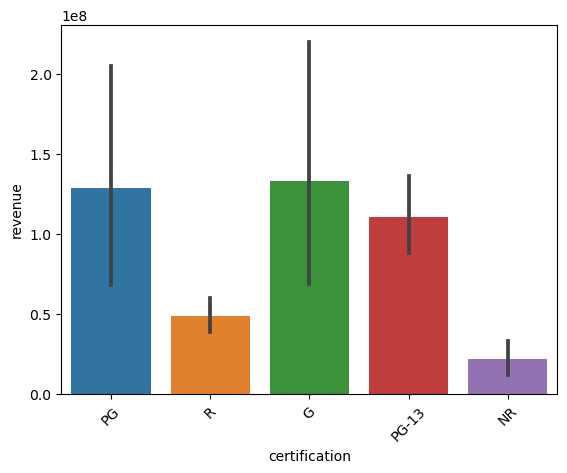

In [62]:
ax = sns.barplot(data=df, x='certification', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [63]:
need_cols = ['certification', 'revenue']
df[need_cols]

,certification,revenue
3,NaN,14204632.0
10,NaN,14904.0
12,NaN,224834564.0
15,NaN,105983.0
16,NaN,546388105.0
...,...,...
4866,NaN,342855.0
4897,NaN,80631.0
5009,PG,482902.0
5121,NaN,123021750.0


In [64]:
groups ={}

for certification in df['certification'].unique():
    temp = df.loc[df['certification']== certification, 'revenue']
    groups[certification] = temp

groups.keys()

dict_keys([nan, 'PG', 'R', 'G', 'PG-13', 'NR'])

In [66]:
groups['PG']

2600     14204632.0
2615     36754634.0
2618     36609995.0
2623    354248063.0
2624     35134820.0
2635     76432727.0
2668     35547761.0
2676     59468275.0
2744    345823040.0
2807     60874615.0
2816     62464731.0
2896            1.0
3040    136706683.0
3162    110317580.0
3522     16600000.0
3864    487853320.0
3905      8100000.0
3923     13596911.0
3933     16176732.0
4080    147934180.0
4092    186053725.0
4097     39438674.0
4138     93375151.0
4151    176104344.0
4160    976475550.0
4220    274925095.0
4490     37317558.0
4641     24516772.0
4810     10229331.0
5009       482902.0
Name: revenue, dtype: float64

In [67]:
for certification, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {certification} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[certification] = data

There were 0 outliers in the nan group.
There were 1 outliers in the PG group.
There were 4 outliers in the R group.
There were 1 outliers in the G group.
There were 2 outliers in the PG-13 group.
There were 0 outliers in the NR group.


In [69]:
norm_results = [['group','n','pval','sig?']]

## loop through group dict
for certification, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([certification,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1343: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Jacob\anaconda3\envs\dojo-env\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.

In [70]:
result = stats.levene(groups['PG'],
            groups['R'],
            groups['G'], 
            groups['NR'],
            groups['PG-13'])

In [71]:
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=nan, pvalue=nan)


In [72]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups DO have equal variance.


In [73]:
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=nan, pvalue=nan)


False

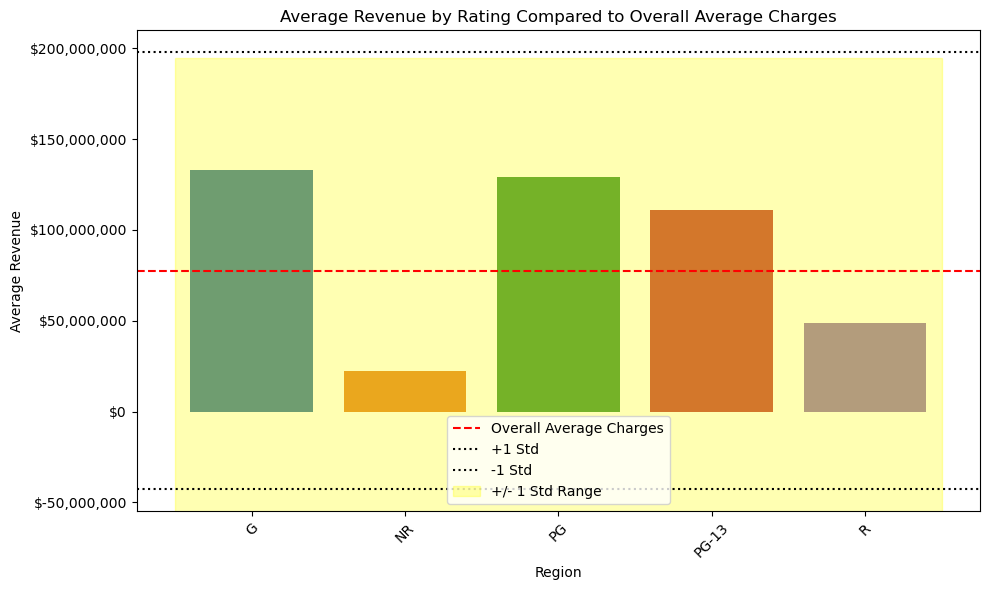

In [75]:
average_charges_by_certification = df.groupby('certification')['revenue'].mean().reset_index()

overall_average_revenue = df['revenue'].mean()
std = df['revenue'].std()

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=average_charges_by_certification, x='certification', y='revenue')

plt.axhline(y=overall_average_revenue, color='red', linestyle='--', label='Overall Average Charges')
plt.axhline(overall_average_revenue + std, color='black', linestyle='dotted', label='+1 Std')
plt.axhline(overall_average_revenue - std, color='black', linestyle='dotted', label='-1 Std')

plt.axvspan(-0.5, len(average_revenue_by_certification) - 0.5, ymin=(overall_average_revenue - std) / ax.get_ylim()[1],
            ymax=(overall_average_revenue + std) / ax.get_ylim()[1], color='yellow', alpha=0.3, label='+/- 1 Std Range')


ax.set(ylabel='Average Revenue')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.title('Average Revenue by Rating Compared to Overall Average Charges')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

#### Q2
Do movies that are over 2 hours long earn more revenue than movies that are 1.5 hours long (or less)?
#### Null Hypothesis
There is no difference in earned revenue between movies that are over 2 hours long, than movies that are 1.5 hours long or less 
#### Alternative Hypothesis
There is a significant difference in earned revenue between movies that are over 2 hours long, than movies that are 1.5 hours long or less 


* Numerical Data
* Two groups runtime and revenue
* Run a 2-sample T-test.




In [76]:
df['revenue'].describe()

count    7.180000e+02
mean     7.754966e+07
std      1.203420e+08
min      1.000000e+00
25%      8.144754e+06
50%      3.135591e+07
75%      9.316697e+07
max      9.764756e+08
Name: revenue, dtype: float64

In [77]:
df['runtime'].describe()

count    718.000000
mean     108.587744
std       20.908713
min       74.000000
25%       94.000000
50%      104.000000
75%      119.000000
max      224.000000
Name: runtime, dtype: float64

In [78]:
df['over_2_hour'] = df['runtime']> 120
df['over_2_hour'].value_counts()

False    556
True     162
Name: over_2_hour, dtype: int64

In [79]:
needed_cols = ['over_2_hour','revenue']

df[needed_cols]

needed_cols = ['over_2_hour', 'revenue']

# Display rows where 'over_2_hour' is True along with 'revenue' column
selected_rows = df.loc[df['over_2_hour'], needed_cols]
print(selected_rows)

      over_2_hour      revenue
15           True     105983.0
16           True  546388105.0
53           True   34566746.0
55           True   39459427.0
60           True   15000000.0
...           ...          ...
4652         True   87754044.0
4744         True    3786801.0
4842         True    4099000.0
4897         True      80631.0
5139         True     500000.0

[162 rows x 2 columns]


In [80]:
over_2_hour_df = df.loc[ df['over_2_hour']==True, needed_cols]
over_2_hour_df

,over_2_hour,revenue
15,True,105983.0
16,True,546388105.0
53,True,34566746.0
55,True,39459427.0
60,True,15000000.0
...,...,...
4652,True,87754044.0
4744,True,3786801.0
4842,True,4099000.0
4897,True,80631.0


In [81]:
df['under_90min'] = df['runtime']< 90
df['under_90min'].value_counts()

False    624
True      94
Name: under_90min, dtype: int64

In [82]:
under_90min_df = df.loc[ df['under_90min']==True, needed_cols]
under_90min_df

,over_2_hour,revenue
10,False,14904.0
12,False,224834564.0
19,False,169327687.0
26,False,354248063.0
27,False,35134820.0
...,...,...
4547,False,18634654.0
4576,False,490475.0
4578,False,246.0
4602,False,66468332.0


In [83]:
plot_df = pd.concat([under_90min_df, over_2_hour_df])
plot_df

,over_2_hour,revenue
10,False,14904.0
12,False,224834564.0
19,False,169327687.0
26,False,354248063.0
27,False,35134820.0
...,...,...
4652,True,87754044.0
4744,True,3786801.0
4842,True,4099000.0
4897,True,80631.0


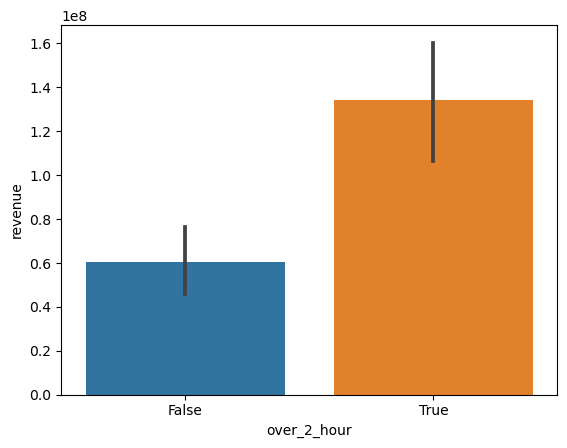

In [86]:
sns.barplot(data=plot_df, x='over_2_hour',y='revenue');

In [87]:
under_90min_group = under_90min_df['revenue']
over_2_hour_group = over_2_hour_df['revenue']

In [88]:
u90min_outliers = np.abs(stats.zscore(under_90min_group)) > 3
u90min_outliers.sum()

2

In [89]:
o2hr_outliers = np.abs(stats.zscore(over_2_hour_group)) > 3
o2hr_outliers.sum()

4

In [90]:
result = stats.levene(under_90min_group, over_2_hour_group)
print(result)

LeveneResult(statistic=12.380279645066997, pvalue=0.0005139533744165362)


In [91]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [92]:
result = stats.ttest_ind(under_90min_group, over_2_hour_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=-4.5736760174445195, pvalue=7.737064829590071e-06)


True

In [93]:
under_90min_group.mean()

60181275.97872341

In [94]:
over_2_hour_group.mean()

134300777.0617284

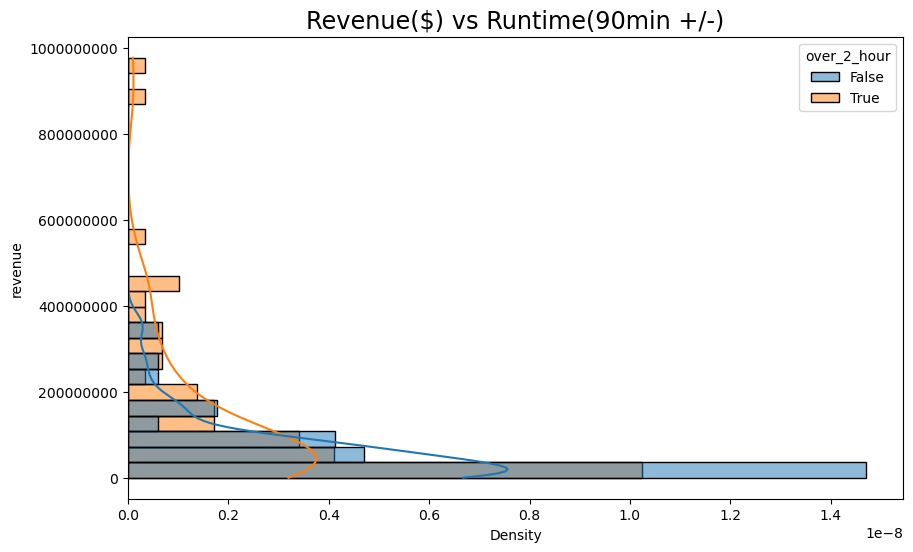

In [96]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=plot_df, y='revenue',fill=True,hue='over_2_hour',kde=True,
                  stat='density',common_norm=False)
ax.ticklabel_format(style='plain', axis='y')
plt.title('Revenue($) vs Runtime(90min +/-)', fontsize='xx-large');

#### Q3
Do some movie genres earn more revenue than others?
#### Null Hypothesis
The genre of a movie has no affect on revenue 

#### Alternative Hypothesis
The genre of a movie has a significant affect on revenue 



* Numerical Data
* Two groups revenue and genre(ohe)
* Run a 2-sample T-test.

In [ ]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

## Improving Model

## Checking for Linearity

In [ ]:
## concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

In [ ]:
## save plot_cols list to show (dropping genre from plot_df from pair_plot)
genre_cols = [c for c in df.columns if c.startswith('Genre')]
plot_cols = plot_df.drop(columns=['revenue',*genre_cols]).columns
len(plot_cols)

In [ ]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[:6])

In [ ]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[6:13])

In [ ]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[13:])

In [ ]:
# remove movies prior to 2000
df = df.loc[ df['year']>=2000]
df

In [ ]:
def get_train_test_split(df_, y_col='revenue',drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    final_drop_cols = []
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse=False))
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )

    preprocessor = make_column_transformer((num_pipe, num_cols),
                                           (cat_pipe,cat_cols),remainder='passthrough')
    
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    ## Finding the categorical pipeline in our col transformer.
    preprocessor.named_transformers_['pipeline-2']

    ## B) Using list-slicing to find the encoder 
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


    ## Create the empty list
    final_features = [*cat_features,*num_cols,*already_ohe_cols]

    ## Make df verisons of x data
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=final_features, index=X_train.index)


    X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                             columns=final_features, index=X_test.index)


    ### Adding a Constant for Statsmodels
    ## Make final X_train_df and X_test_df with constants added
    X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
    X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
    return X_train_df, y_train, X_test_df, y_test

In [ ]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [ ]:
sns.boxplot(x = y_train)

## Removing Outliers
#### Z score

In [ ]:
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [ ]:
def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers

In [ ]:
outliers_iqr = find_outliers_IQR(df['revenue'])
outliers_iqr

In [ ]:
## Loop to remove outliers from same clumns using new function
outlier_cols = ['runtime','popularity','revenue']

## Empty dict for both types of outliers
outliers_z = {}
outliers_iqr = {}

## Use both functions to see the comparison for # of outliers
for col in outlier_cols:
    outliers_col_z = find_outliers(df[col])
    outliers_z[col] = outliers_col_z
    
    outliers_col_iqr = find_outliers_IQR(df[col])
    outliers_iqr[col] = outliers_col_iqr
    print()
    

In [ ]:
# remove_outliers 
df_clean_z = df.copy()
for col, idx_outliers in outliers_z.items():
    df_clean_z = df_clean_z[~idx_outliers]
df_clean_z

In [ ]:
# remove_outliers
df_clean_iqr = df.copy()
for col, idx_outliers in outliers_iqr.items():
    df_clean_iqr = df_clean_iqr[~idx_outliers]
df_clean_iqr

## Model with Outliers Removed  
#### (Z_scores)

In [ ]:
## MAKE NEW MODEL WITH IQR OUTLIERS REMOVED

X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean_iqr)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
display(result.summary())
evaluate_ols(result,X_train_df,y_train)

## Pvalues

In [ ]:
pvals = result.pvalues 
pvals

In [ ]:
pvals[ pvals>.05]

## Feature engineering by p-values

In [ ]:
## Get list of ALL genre columns to see how many are sig
genre_cols = [c for c in df_clean.columns if c.startswith("Genre")]
genre_cols

In [ ]:
## save just genre pvalues
genre_pvals = pvals[genre_cols]
## calc what % are insig?
genre_pvals.sum()/len(genre_pvals)

In [ ]:
## what pvals are remaining?
other_pvals = pvals.drop([*comp_cols, *genre_cols])
other_pvals[other_pvals>.05]

In [ ]:
## Make x,y vars, but drop features with bad pvalues
df_clean_iqr = df_clean_iqr.drop(columns=['adult','budget'])
X_train_df, y_train, X_test_df, y_test = \
                                get_train_test_split(df_clean_iqr,)
## MAKE AND EVALUATE OLS
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

## Multicollinearity

In [ ]:
## Calculating the mask to hide the upper-right of the triangle
plt.figure(figsize=(25,25))
corr = X_train_df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

In [ ]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new dataframe to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

In [ ]:
## Sort VIF for inspect
VIF.sort_values()

In [ ]:
## Set float format to view vals not in scientfic notation
pd.set_option('display.float_format',lambda x: f'{x:.2f}')

In [ ]:
## remove infinite values from VIF and sort
VIF = VIF[VIF!=np.inf].sort_values()
VIF

In [ ]:
## filter for VIF that are > 5
VIF[VIF>5]

In [ ]:
high_vif = VIF[VIF>5].index
high_vif

## Final Model

In [ ]:
## make new df_final copy of prev df
df_final = df_clean_iqr.drop(columns =high_vif).copy()
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_final)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [ ]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

In [ ]:
plt.figure(figsize=(5,16))
ax =result.params.sort_values().plot(kind='barh')
ax.axvline()

## Linear Reg vs RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_df, y_train)

In [ ]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = reg.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = reg.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

In [ ]:
evaluate_ols(reg, X_train_df, y_train)

In [ ]:
importances = pd.Series(reg.feature_importances_, index=X_train_df.columns)
importances.sort_values().tail(25).plot(kind='barh',figsize=(6,10))
